In [ ]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-12 18:12:32,038 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-12 18:12:32,040 - settings - Setting database.user to celiib
INFO - 2021-01-12 18:12:32,041 - settings - Setting database.password to newceliipass
INFO - 2021-01-12 18:12:32,046 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-12 18:12:32,047 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-12 18:12:32,058 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-12 18:12:32,337 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-12 18:12:32,372 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-12 18:12:32,372 - settings - Setting database.user to celiib
INFO - 2021-01-12 18:12:32,373 - settings - Setting database.password to newceliipass
INFO - 2021-01-12 18:12:32,374 - settings - Setting enable_python_native_blobs to True


Sleeping 191 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-12 18:12:32,620 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 3511


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7824282.380889241,3678098.820011452,27089.939,79.7,79.7,495.553,456.914,2130,0.00027222943860033875,11.513513513513514,3959944.957,71,0.0005378862643620327,30.0,217619006067.48697,59992605.27867258,27813.2863147961,54955.05832291976,3065056423.485732,1298.7173
864691135012398582,0,0.25,29.00,0,=BLOB=,1376990,2794781,0,4,1,4,2,9,331,129,13903026.646273784,4736919.313152046,24796.33,187.388,186.295,502.297,460.402,5205,0.0003743789127668123,15.725075528700906,8722973.997,175,0.0005967001623288228,29.743,911267911282.6133,94869445.23332134,65544.57057930235,104467.5716786518,5207245207.329219,2604.4532
864691135012471798,0,0.25,29.00,0,=BLOB=,879119,1793791,0,1,1,0,1,4,289,245,10545701.713406056,8374871.339385826,20318.51,101.514,101.514,478.023,425.897,2658,0.0002520458166023281,9.197231833910035,6162133.268,126,0.00043134412782063836,21.095,334671873701.14355,73603234.65274492,31735.382129735117,54311.041184243266,2656125981.7551074,3508.8503
864691135012571126,0,0.25,29.00,0,=BLOB=,1405952,2834699,0,5,5,0,1,9,439,190,15000091.889040658,5950211.886670216,22542.824,139.648,139.648,468.777,408.375,5404,0.0003602644597096276,12.309794988610479,8640395.253,216,0.0006254343512958735,25.019,976000132123.9475,107471073.68609047,65066.27688307904,112957.81078823611,4518519130.203461,4797.4468
864691135012905110,0,0.25,29.00,0,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9675627.15202663,3911641.696373985,24465.544,87.846,87.846,383.783,363.92,2135,0.00022065753118161535,8.50597609561753,5031174.543,95,0.00042435419040877436,22.474,388395999218.4453,100623801.14855957,40141.68726386827,77197.87812943809,4088378939.1415296,2073.6969
864691135065018692,0,0.25,29.00,0,=BLOB=,927599,1896021,0,1,1,1,2,19,273,62,10133780.765040418,2065336.4266345776,17535.369,109.943,109.943,546.409,539.932,2029,0.0002002214224921519,7.4322344322344325,5474214.867,121,0.00037064675926978005,16.769,269603278823.37152,70905449.51999664,26604.41202294909,49249

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,75d0c425a0f308260b63627d20278b08,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,26749,31120,2021-01-12 12:11:49
__neuron_split_suggestions,9d8ae05fb49445938c99eaadb56e4ea9,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,26340,31116,2021-01-12 12:10:28


INFO - 2021-01-12 18:12:32,776 - autopopulate - Found 78 keys to populate
INFO - 2021-01-12 18:12:32,811 - connection - Transaction started
INFO - 2021-01-12 18:12:32,813 - autopopulate - Populating: {'segment_id': 864691135407333321, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0}


Populate Started


----- Working on Neuron 864691135407333321-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[ 84 157]
 [ 84 166]
 [ 84 234]
 [157 166]
 [157 234]
 [166 234]]


---- working on disconnecting 84 and 157
---- This disconnects S0_0 from S2_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [84, 85, 88, 92, 96, 103, 202, 210, 208, 167, 163, 157]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 72  82  85  88  89  92  93  96 102 103 126 162 163 167 196 201 202 207
 208 209 210 213]
Short segments to combine = []
Found 1 high degree coordinates to cut
Picking [ 656953.35411718  342147.79051344 1066189.88834102] high deg

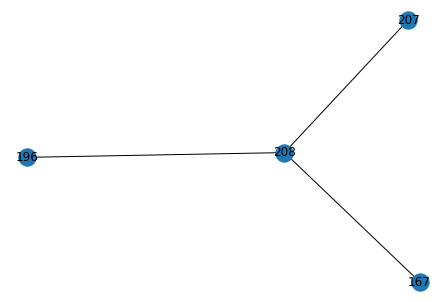

match_branches = [[167, 207], [196, 208]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[167, 207], [196, 208]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[167, 207], [196, 208]]
Number of connected components = 2
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 44, 45, 46, 55, 56, 59, 60, 61, 62, 63, 73, 74, 75, 95, 106, 107, 108, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128

  Edge: [157 162]: curr_angle = 41.34
  Edge: [162 164]: curr_angle = 133.3
  Edge: [164 165]: curr_angle = 73.11
  Edge: [165 159]: curr_angle = 30.59
  Edge: [159 160]: curr_angle = 83.1
  Edge: [160 173]: curr_angle = 36.22
  Edge: [173 161]: curr_angle = 97.99

Total time for doubling_back = 0.433499813079834
There were 1 edges that passed doubling back threshold of 100
Winning edge [162 164] had a doubling back of 133.30053902499665
***inside resolve crossover!!!!****
coordinate_branches = [135, 162, 164]
135 = red
162 = aqua
164 = purple
Angle between 135 and 162 = 6.55 
Angle between 135 and 164 = 38.09 
Angle between 162 and 164 = 135.4 
Final Matches = [[135, 162]]
matched_branches_revised = [[135, 162]]
Original graph


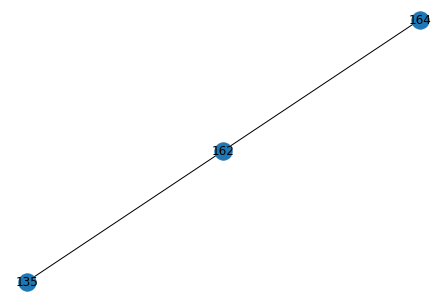

match_branches = [[135, 162]]
edges_to_delete (resolve crossover) = [[135, 164], [162, 164]]
edges_to_create (resolve crossover) = [[135, 162]]
edges_to_delete (cut_limb_network) = [array([135, 164]), array([162, 164])]
edges_to_create = [[135, 162]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 157, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 244, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 248, 234, 235, 236, 233, 249, 239, 251, 240, 243, 116, 245, 118, 254, 120, 246, 250, 123, 252, 253, 126, 255}
Comp 2 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10,

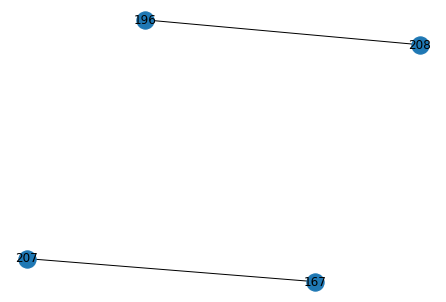

match_branches = [[167, 207], [196, 208]]
edges_to_delete (resolve crossover) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create (resolve crossover) = [[167, 207], [196, 208]]
curr_limb.deleted_edges 5 =[[167, 196], [167, 208], [196, 207], [207, 208], array([135, 164]), array([162, 164])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[167, 196], [167, 208], [196, 207], [207, 208]]
edges_to_create = [[167, 207], [196, 208]]
Number of connected components = 3
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {256, 257, 258, 259, 260, 261, 262, 135, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 157, 162, 163, 167, 169, 264, 182, 199, 247, 204, 205, 206, 207, 244, 211, 215, 216, 219, 220, 221, 222, 

  Edge: [157 163]: curr_angle = 41.95
  Edge: [163 167]: curr_angle = 16.46
  Edge: [167 207]: curr_angle = 4.53
  Edge: [207 211]: curr_angle = 44.38
  Edge: [211 206]: curr_angle = 10.86
  Edge: [206 216]: curr_angle = 27.16
  Edge: [216 226]: curr_angle = 26.43
  Edge: [226 229]: curr_angle = 31.68
  Edge: [229 230]: curr_angle = 11.4
  Edge: [230 231]: curr_angle = 25.55
  Edge: [231 232]: curr_angle = 23.0
  Edge: [232 234]: curr_angle = 24.55

Total time for doubling_back = 2.0245838165283203

Attempting the width jump check (attempting from both sides)
  Edge: [157 163]: jump = -76.91
  Edge: [163 167]: jump = -90.94
  Edge: [167 207]: jump = 216.94
Adding error edge [167 207] because width jump was 216.93791182112358
  Edge: [207 211]: jump = -289.61
  Edge: [211 206]: jump = 16.19
  Edge: [206 216]: jump = 117.08
  Edge: [216 226]: jump = 354.26
Adding error edge [216 226] because width jump was 354.2613713553545
  Edge: [226 229]: jump = 74.93
  Edge: [229 230]: jump = 75.4
 

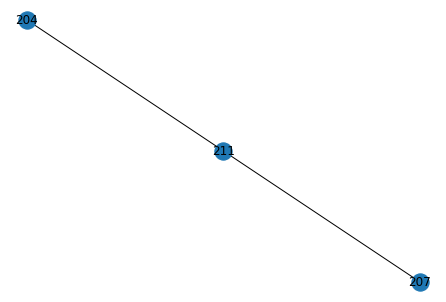

match_branches = []
edges_to_delete (resolve crossover) = [[204, 207], [204, 211], [207, 211]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([204, 207]), array([204, 211]), array([207, 211])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {2, 80, 23, 152, 25, 26, 153, 28, 81, 36, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 87, 57, 58, 64, 65, 66, 67, 68, 69, 70, 196, 72, 201, 202, 71, 76, 77, 78, 79, 208, 209, 82, 83, 84, 85, 210, 213, 88, 89, 90, 91, 92, 93, 86, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 110, 111}
Comp 1 = {162, 163, 167, 135, 207, 116, 118, 120, 123, 157, 126}
Comp 2 = {204}
Comp 3 = {256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 169, 182, 199, 205, 206, 211, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 239, 240, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255}
Comp 4 = {0, 1, 3, 

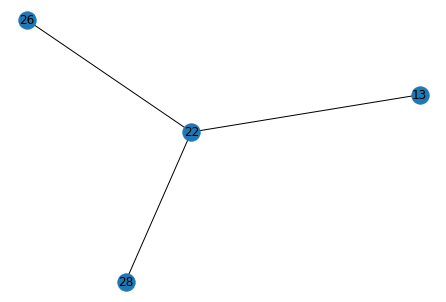

match_branches = [[13, 28]]
edges_to_delete (resolve crossover) = [[13, 22], [13, 26], [22, 26], [22, 28], [26, 28]]
edges_to_create (resolve crossover) = [[13, 28]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[13, 22], [13, 26], [22, 26], [22, 28], [26, 28]]
edges_to_create = [[13, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 7, 8, 10, 12, 13, 14, 15, 28}
Comp 1 = {4, 5, 6, 9, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}
Comp 2 = {26}
curr_limb_copy.deleted_edges = [[13, 22], [13, 26], [22, 26], [22, 28], [26, 28]]
curr_limb_copy.created_edges = [[13, 28]]
After get best cut: cut_edges = [[13, 22], [13, 26], [22, 26], [22, 28], [26, 28]], added_edges = [[13, 28]]
total_soma_paths_to_cut = []
-----------counter = 0--------

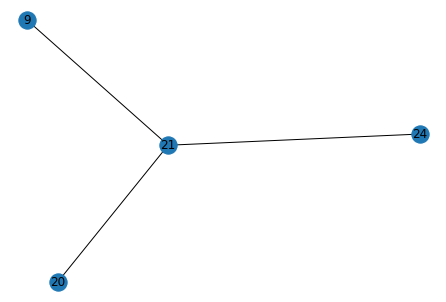

match_branches = [[20, 21]]
edges_to_delete (resolve crossover) = [[9, 20], [9, 21], [9, 24], [20, 24], [21, 24]]
edges_to_create (resolve crossover) = [[20, 21]]
curr_limb.deleted_edges 5 =[[13, 22], [13, 26], [22, 26], [22, 28], [26, 28]]
Skipping endnode 58 because skeletal distance was 732.7691314716142 and threshold was 2500
skip_nodes = [58]
edges_to_delete (cut_limb_network) = [[9, 20], [9, 21], [9, 24], [20, 24], [21, 24]]
edges_to_create = [[20, 21]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 7, 8, 10, 12, 13, 14, 15, 28}
Comp 1 = {5, 16, 17, 18, 19, 20, 21, 22}
Comp 2 = {26}
Comp 3 = {9}
Comp 4 = {4, 6, 11, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}
Comp 5 = {23}
curr_limb_copy.deleted_edges = [[13, 22], [13, 26], [22, 26], [22, 28], [26, 28], [9, 20], [9, 21], [9, 24], [20, 24], [21, 24]

  Edge: [36 28]: curr_angle = 27.22
  Edge: [28 23]: curr_angle = 30.61
  Edge: [23 13]: curr_angle = 53.61
  Edge: [13 12]: curr_angle = 139.08
  Edge: [12 16]: curr_angle = 18.31
  Edge: [16 19]: curr_angle = 16.27
  Edge: [19 40]: curr_angle = 62.05

Total time for doubling_back = 1.1702954769134521
There were 1 edges that passed doubling back threshold of 100
Winning edge [13 12] had a doubling back of 139.07723963350875
***inside resolve crossover!!!!****
coordinate_branches = [1, 12, 13]
1 = red
12 = aqua
13 = purple
Angle between 1 and 12 = 9.0 
Angle between 1 and 13 = 42.63 
Angle between 12 and 13 = 144.38 
Final Matches = [[1, 12]]
matched_branches_revised = [[1, 12]]
Original graph


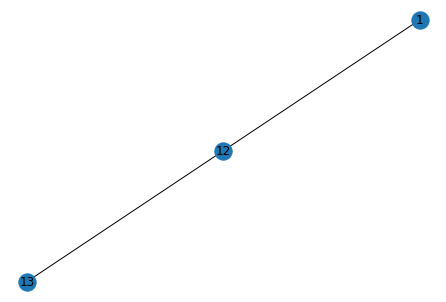

match_branches = [[1, 12]]
edges_to_delete (resolve crossover) = [[1, 13], [12, 13]]
edges_to_create (resolve crossover) = [[1, 12]]
edges_to_delete (cut_limb_network) = [array([ 1, 13]), array([12, 13])]
edges_to_create = [[1, 12]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 15, 16, 18, 19, 24, 25, 27, 29, 31, 32, 33, 34, 37, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}
Comp 1 = {35, 36, 38, 7, 10, 42, 13, 14, 45, 17, 20, 21, 22, 23, 26, 28, 30}
curr_limb_copy.deleted_edges = [array([ 1, 13]), array([12, 13])]
curr_limb_copy.created_edges = [[1, 12]]
After get best cut: cut_edges = [array([ 1, 13]), array([12, 13])], added_edges = [[1, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL

  Edge: [40 19]: curr_angle = 67.19
  Edge: [19 39]: curr_angle = 94.19
  Edge: [39 37]: curr_angle = 16.35
  Edge: [37 41]: curr_angle = 8.48
  Edge: [41 43]: curr_angle = 14.25
  Edge: [43 46]: curr_angle = 52.12
  Edge: [46 47]: curr_angle = 32.59
  Edge: [47 57]: curr_angle = 18.9
  Edge: [57 59]: curr_angle = 30.92
  Edge: [59 62]: curr_angle = 5.02
  Edge: [62 63]: curr_angle = 46.37
  Edge: [63 65]: curr_angle = 34.04
  Edge: [65 70]: curr_angle = 32.58
  Edge: [70 69]: curr_angle = 27.76
  Edge: [69 71]: curr_angle = 6.37
  Edge: [71 73]: curr_angle = 28.01

Total time for doubling_back = 1.3724982738494873

Attempting the width jump check (attempting from both sides)
  Edge: [40 19]: jump = -517.45
  Edge: [19 39]: jump = 293.46
Adding error edge [19 39] because width jump was 293.4597782036708
  Edge: [39 37]: jump = -237.06
  Edge: [37 41]: jump = -48.21
  Edge: [41 43]: jump = -92.67
  Edge: [43 46]: jump = -222.77
  Edge: [46 47]: jump = -203.33
  Edge: [47 57]: jump = -7.

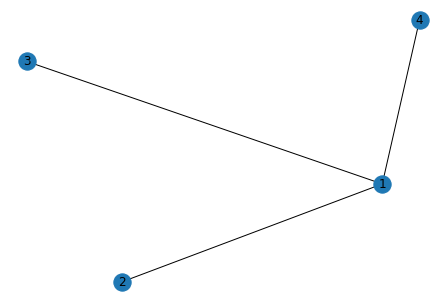

match_branches = [[1, 3]]
edges_to_delete (resolve crossover) = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create (resolve crossover) = [[1, 3]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 5 because skeletal distance was 1892.7487816963512 and threshold was 2500
skip_nodes = [5]
edges_to_delete (cut_limb_network) = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
edges_to_create = [[1, 3]]
Number of connected components = 3
Comp 0 = {1, 3}
Comp 1 = {0, 2, 5}
Comp 2 = {4}
curr_limb_copy.deleted_edges = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]]
curr_limb_copy.created_edges = [[1, 3]]
After get best cut: cut_edges = [[1, 2], [1, 4], [2, 3], [2, 4], [3, 4]], added_edges = [[1, 3]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the spl

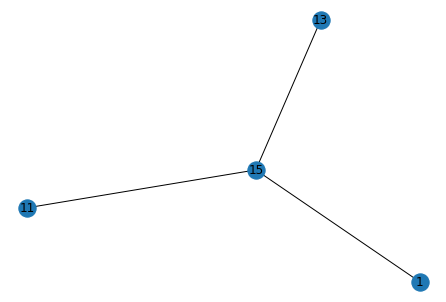

match_branches = [[13, 15]]
edges_to_delete (resolve crossover) = [[1, 11], [1, 13], [1, 15], [11, 13], [11, 15]]
edges_to_create (resolve crossover) = [[13, 15]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 11], [1, 13], [1, 15], [11, 13], [11, 15]]
edges_to_create = [[13, 15]]
Number of connected components = 6
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 11, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139}
Comp 3 = {14}
Comp 4 = {48}
Comp 5

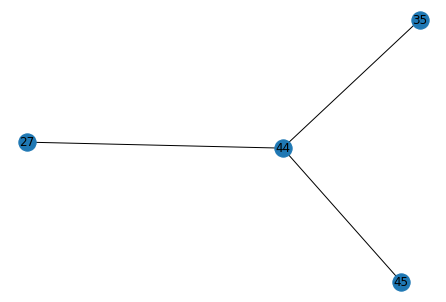

match_branches = [[27, 44], [35, 45]]
edges_to_delete (resolve crossover) = [[27, 35], [27, 45], [35, 44], [44, 45]]
edges_to_create (resolve crossover) = [[27, 44], [35, 45]]
curr_limb.deleted_edges 5 =[[1, 11], [1, 13], [1, 15], [11, 13], [11, 15]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[27, 35], [27, 45], [35, 44], [44, 45]]
edges_to_create = [[27, 44], [35, 45]]
Number of connected components = 9
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 11, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 47, 50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 96, 97, 99, 100}
Comp 3 = {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 35, 37, 45, 60, 64, 69, 73, 79, 92, 93, 94, 95, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 1

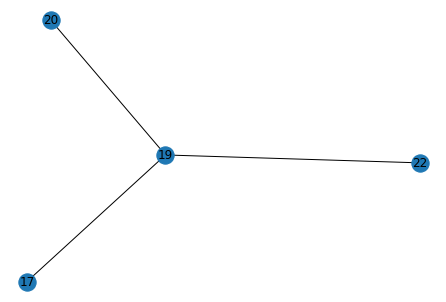

match_branches = [[19, 22]]
edges_to_delete (resolve crossover) = [[17, 19], [17, 20], [17, 22], [19, 20], [20, 22]]
edges_to_create (resolve crossover) = [[19, 22]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 20 because skeletal distance was 1211.1242950394644 and threshold was 2500
Could not used the revised endnodes path because empty
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 19], [17, 20], [17, 22], [19, 20], [20, 22]]
edges_to_create = [[19, 22]]
Number of connected components = 4
Comp 0 = {20}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Comp 2 = {19, 22, 23, 24, 25, 26}
Comp 3 = {21}
curr_limb_copy.deleted_edges = [[17, 19], [17, 20], [17, 22], [19, 20], [20, 22]]
curr_limb_copy.created_edges = [[19, 22]]
After get best cut: cut_edges = [[17, 19], [17, 20], [17, 22], [19, 20], [20, 22]], added_edges = [[19, 22]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of 

  Edge: [3 5]: curr_angle = 45.29
  Edge: [5 1]: curr_angle = 79.57
  Edge: [1 2]: curr_angle = 34.32
  Edge: [2 7]: curr_angle = 29.14

Total time for doubling_back = 0.21104860305786133

Attempting the width jump check (attempting from both sides)
  Edge: [3 5]: jump = -168.18
  Edge: [5 1]: jump = -226.62
  Edge: [1 2]: jump = 65.63
  Edge: [2 7]: jump = 168.65
Total time for width = 0.18787097930908203
Path starting at 3 had err_edges: []
  Edge: [7 2]: jump = -168.65
  Edge: [2 1]: jump = -65.63
  Edge: [1 5]: jump = 226.62
Adding error edge [1 5] because width jump was 226.62270594929322
  Edge: [5 3]: jump = 168.18
Total time for width = 0.20271062850952148
Path starting at 7 had err_edges: [[1, 5]]
first_error_sizes = [-inf, 226.62270594929322], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [1, 4, 5]
1 = red
4 = aqua
5 = purple
Angle between 1 and 4 = 70.71 
Angle between 1 and 5 = 83.69 
Angle between 4 and 5 = 26.2 
Final Matches = [[4, 5]]
matche

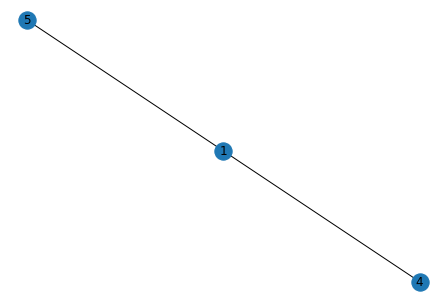

match_branches = [[4, 5]]
edges_to_delete (resolve crossover) = [[1, 4], [1, 5]]
edges_to_create (resolve crossover) = [[4, 5]]
edges_to_delete (cut_limb_network) = [array([1, 4]), array([1, 5])]
edges_to_create = [[4, 5]]
Number of connected components = 2
Comp 0 = {3, 4, 5, 6, 9, 10, 11, 12, 13, 14}
Comp 1 = {0, 1, 2, 7, 8, 15, 16}
curr_limb_copy.deleted_edges = [array([1, 4]), array([1, 5])]
curr_limb_copy.created_edges = [[4, 5]]
After get best cut: cut_edges = [array([1, 4]), array([1, 5])], added_edges = [[4, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 3,  4,  5,  6,  9, 10, 11, 12, 13, 14]), array([ 0,  1,  2,  7,  8, 15, 16])]


 ------ Total time for Splitting 864691135724299179 = 108.9579916

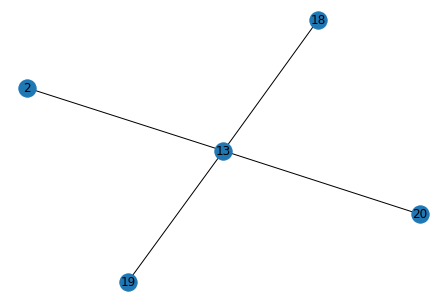

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
edges_to_create = [[13, 18]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112}
Comp 1 = {2}
Comp 2 = {19}
curr_limb_copy.deleted_edges = [[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [

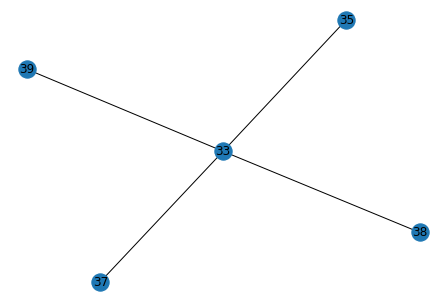

match_branches = [[33, 38], [35, 37]]
edges_to_delete (resolve crossover) = [[33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
edges_to_create (resolve crossover) = [[33, 38], [35, 37]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
edges_to_create = [[33, 38], [35, 37]]
Number of connected components = 5
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 1

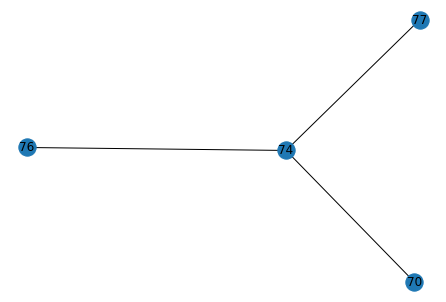

match_branches = [[70, 77], [74, 76]]
edges_to_delete (resolve crossover) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create (resolve crossover) = [[70, 77], [74, 76]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20], [33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create = [[70, 77], [74, 76]]
Number of connected components = 6
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11

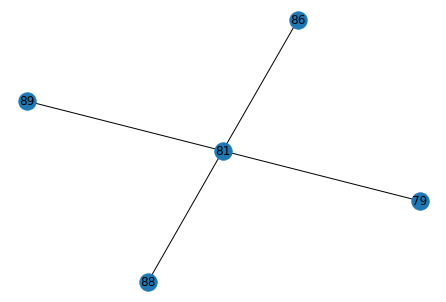

match_branches = [[81, 86]]
edges_to_delete (resolve crossover) = [[79, 81], [79, 86], [79, 88], [79, 89], [81, 88], [81, 89], [86, 88], [86, 89], [88, 89]]
edges_to_create (resolve crossover) = [[81, 86]]
curr_limb.deleted_edges 5 =[[2, 13], [2, 18], [2, 19], [2, 20], [13, 19], [13, 20], [18, 19], [18, 20], [19, 20], [33, 35], [33, 37], [33, 39], [35, 38], [35, 39], [37, 38], [37, 39], [38, 39], [70, 74], [70, 76], [74, 77], [76, 77]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[79, 81], [79, 86], [79, 88], [79, 89], [81, 88], [81, 89], [86, 88], [86, 89], [88, 89]]
edges_to_create = [[81, 86]]
Number of connected components = 9
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 78, 81, 82, 83, 84, 85, 86, 87

  Edge: [29 27]: curr_angle = 27.16
  Edge: [27 24]: curr_angle = 3.15
  Edge: [24 25]: curr_angle = 21.45
  Edge: [25 26]: curr_angle = 26.68
  Edge: [26 34]: curr_angle = 53.39
  Edge: [34 44]: curr_angle = 15.29
  Edge: [44 49]: curr_angle = 24.11
  Edge: [49 60]: curr_angle = 29.47
  Edge: [60 64]: curr_angle = 27.33
  Edge: [64 67]: curr_angle = 18.01
  Edge: [67 68]: curr_angle = 27.06
  Edge: [68 72]: curr_angle = 19.14
  Edge: [72 74]: curr_angle = 13.36
  Edge: [74 76]: curr_angle = 22.24
  Edge: [76 78]: curr_angle = 23.37
  Edge: [78 81]: curr_angle = 2.58
  Edge: [81 86]: curr_angle = 31.68

Total time for doubling_back = 1.9930174350738525

Attempting the width jump check (attempting from both sides)
  Edge: [29 27]: jump = -58.76
  Edge: [27 24]: jump = -132.24
  Edge: [24 25]: jump = -90.04
  Edge: [25 26]: jump = 18.56
  Edge: [26 34]: jump = -416.96
  Edge: [34 44]: jump = 130.55
  Edge: [44 49]: jump = 133.76
  Edge: [49 60]: jump = 95.19
  Edge: [60 64]: jump = 221.7

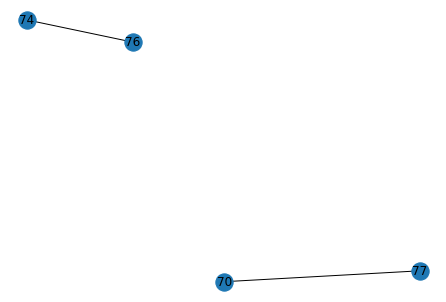

match_branches = [[74, 76], [70, 77]]
edges_to_delete (resolve crossover) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create (resolve crossover) = [[74, 76], [70, 77]]
Rejecting creating edge [74, 76] becuase did not involve only 1 node in the deleted edge
Rejecting creating edge [70, 77] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([70, 74]), array([70, 76]), array([74, 76]), array([74, 77]), array([76, 77])]
edges_to_create = []
Number of connected components = 10
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 51, 52, 55, 56, 57, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 73, 74, 82, 83, 84, 85, 87, 90, 91, 98, 99}
Comp 4 = {39}
Comp 5 = {63, 77, 70, 71}
Comp 6 = {75, 76, 78, 81, 50, 86, 61, 62}
Comp 7 = {79}
Comp 8 = {88}
Comp 9 = {80, 89, 

  Edge: [29 27]: curr_angle = 27.16
  Edge: [27 24]: curr_angle = 3.15
  Edge: [24 25]: curr_angle = 21.45
  Edge: [25 26]: curr_angle = 26.68
  Edge: [26 34]: curr_angle = 53.39
  Edge: [34 44]: curr_angle = 15.29
  Edge: [44 49]: curr_angle = 24.11
  Edge: [49 60]: curr_angle = 29.47
  Edge: [60 64]: curr_angle = 27.33
  Edge: [64 67]: curr_angle = 18.01
  Edge: [67 68]: curr_angle = 27.06
  Edge: [68 72]: curr_angle = 19.14
  Edge: [72 74]: curr_angle = 13.36
  Edge: [74 76]: curr_angle = 22.24
  Edge: [76 78]: curr_angle = 23.37
  Edge: [78 81]: curr_angle = 2.58
  Edge: [81 86]: curr_angle = 31.68

Total time for doubling_back = 2.1479644775390625

Attempting the width jump check (attempting from both sides)
  Edge: [29 27]: jump = -58.76
  Edge: [27 24]: jump = -132.24
  Edge: [24 25]: jump = -90.04
  Edge: [25 26]: jump = 18.56
  Edge: [26 34]: jump = -416.96
  Edge: [34 44]: jump = 130.55
  Edge: [44 49]: jump = 133.76
  Edge: [49 60]: jump = 95.19
  Edge: [60 64]: jump = 221.7

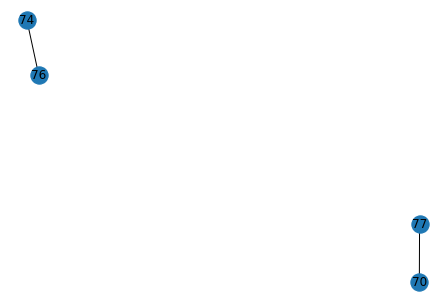

match_branches = [[74, 76], [70, 77]]
edges_to_delete (resolve crossover) = [[70, 74], [70, 76], [74, 77], [76, 77]]
edges_to_create (resolve crossover) = [[74, 76], [70, 77]]
Rejecting creating edge [74, 76] becuase did not involve only 1 node in the deleted edge
Rejecting creating edge [70, 77] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([70, 74]), array([70, 76]), array([74, 76]), array([74, 77]), array([76, 77])]
edges_to_create = []
Number of connected components = 10
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 31, 32, 35, 36, 37, 40, 41, 46, 47, 53, 54}
Comp 1 = {2}
Comp 2 = {19}
Comp 3 = {20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 42, 43, 44, 45, 48, 49, 51, 52, 55, 56, 57, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 73, 74, 82, 83, 84, 85, 87, 90, 91, 98, 99}
Comp 4 = {39}
Comp 5 = {63, 77, 70, 71}
Comp 6 = {75, 76, 78, 81, 50, 86, 61, 62}
Comp 7 = {79}
Comp 8 = {88}
Comp 9 = {80, 89, 

  Edge: [3 2]: curr_angle = 10.8
  Edge: [2 1]: curr_angle = 131.83
  Edge: [1 5]: curr_angle = 54.09

Total time for doubling_back = 0.16948270797729492
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 1] had a doubling back of 131.8348010497163
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 11.39 
Angle between 0 and 2 = 56.97 
Angle between 1 and 2 = 128.88 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


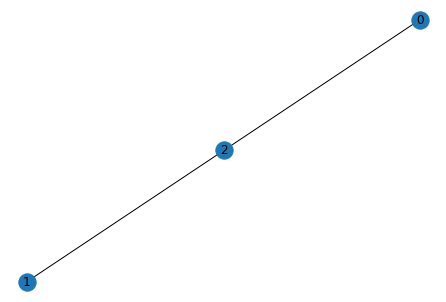

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {2, 3, 4}
Comp 1 = {0, 1, 5, 6}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([2, 3, 4]), array([0, 1, 5, 6])]


 ------ Total time for Splitting 864691135274155493 = 207.49539804458618 ------


----- Working on Neuron 864691135210051520-------
Decompressing Neu

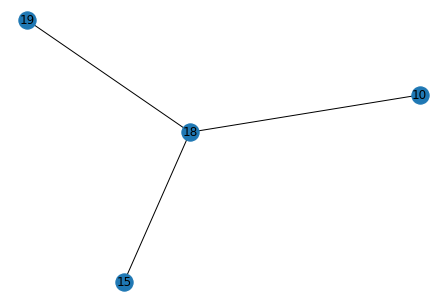

match_branches = []
edges_to_delete (resolve crossover) = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 27 because skeletal distance was 559.5594853661644 and threshold was 2500
skip_nodes = [27]
edges_to_delete (cut_limb_network) = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
edges_to_create = []
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71}
Comp 1 = {10}
Comp 2 = {0, 6, 15}
Comp 3 = {18}
Comp 4 = {29}
curr_limb_copy.deleted_edges = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[10, 15], [10, 18], [10, 19], [15, 18], [15, 19], [18, 19]],

  Edge: [55 50]: curr_angle = 55.87
  Edge: [50 42]: curr_angle = 37.57
  Edge: [42 36]: curr_angle = 16.98
  Edge: [36 32]: curr_angle = 50.09
  Edge: [32 30]: curr_angle = 163.28
  Edge: [30 31]: curr_angle = 160.83
  Edge: [31 52]: curr_angle = 71.03
  Edge: [52 59]: curr_angle = 23.36
  Edge: [59 64]: curr_angle = 76.91

Total time for doubling_back = 0.3368494510650635
There were 2 edges that passed doubling back threshold of 100
Winning edge [32 30] had a doubling back of 163.27935126961964
***inside resolve crossover!!!!****
coordinate_branches = [9, 30, 32]
9 = red
30 = aqua
32 = purple
Angle between 9 and 30 = 136.61 
Angle between 9 and 32 = 9.39 
Angle between 30 and 32 = 38.2 
Final Matches = [[9, 32]]
matched_branches_revised = [[9, 32]]
Original graph


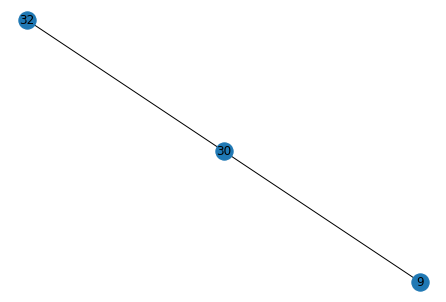

match_branches = [[9, 32]]
edges_to_delete (resolve crossover) = [[9, 30], [30, 32]]
edges_to_create (resolve crossover) = [[9, 32]]
edges_to_delete (cut_limb_network) = [array([ 9, 30]), array([30, 32])]
edges_to_create = [[9, 32]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 55}
Comp 1 = {64, 58, 5, 40, 57, 49, 61, 52, 21, 54, 25, 24, 62, 56, 59, 60, 63, 30, 31}
curr_limb_copy.deleted_edges = [array([ 9, 30]), array([30, 32])]
curr_limb_copy.created_edges = [[9, 32]]
After get best cut: cut_edges = [array([ 9, 30]), array([30, 32])], added_edges = [[9, 32]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next conne

  Edge: [0 2]: curr_angle = 44.23
  Edge: [2 8]: curr_angle = 50.41
  Edge: [8 7]: curr_angle = 77.06
  Edge: [ 7 11]: curr_angle = 40.41
  Edge: [11 10]: curr_angle = 48.49

Total time for doubling_back = 0.5415418148040771

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -157.78
  Edge: [2 8]: jump = 112.15
  Edge: [8 7]: jump = 99.39
  Edge: [ 7 11]: jump = 110.14
  Edge: [11 10]: jump = 299.91
Adding error edge [11 10] because width jump was 299.91392715701795
Total time for width = 0.5209004878997803
Path starting at 0 had err_edges: [[11, 10]]
  Edge: [10 11]: jump = -299.91
  Edge: [11  7]: jump = -110.14
  Edge: [7 8]: jump = 122.55
  Edge: [8 2]: jump = -29.58
  Edge: [2 0]: jump = 157.78
Total time for width = 0.45867395401000977
Path starting at 10 had err_edges: []
first_error_sizes = [299.91392715701795, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [10, 11, 13]
10 = red
11 = aqua
13 = purple
Angle betw

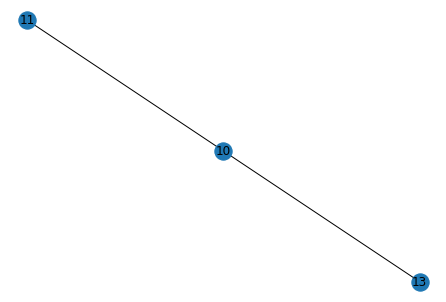

match_branches = []
edges_to_delete (resolve crossover) = [[10, 11], [10, 13], [11, 13]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([10, 11]), array([10, 13]), array([11, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {10}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 2 = {40, 41, 13, 14, 15, 51, 52}
curr_limb_copy.deleted_edges = [array([10, 11]), array([10, 13]), array([11, 13])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([10, 11]), array([10, 13]), array([11, 13])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path 

  Edge: [15 16]: curr_angle = 59.87
  Edge: [16 18]: curr_angle = 137.77
  Edge: [18 22]: curr_angle = 140.2
  Edge: [22 21]: curr_angle = 166.61
  Edge: [21 23]: curr_angle = 30.37
  Edge: [23 24]: curr_angle = 174.81

Total time for doubling_back = 0.33641767501831055
There were 4 edges that passed doubling back threshold of 100
Winning edge [23 24] had a doubling back of 174.80796619424308
***inside resolve crossover!!!!****
coordinate_branches = [17, 23, 24]
17 = red
23 = aqua
24 = purple
Angle between 17 and 23 = 85.45 
Angle between 17 and 24 = 57.71 
Angle between 23 and 24 = 45.56 
Final Matches = []
matched_branches_revised = []
Original graph


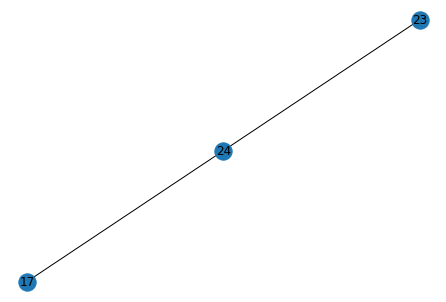

match_branches = []
edges_to_delete (resolve crossover) = [[17, 23], [17, 24], [23, 24]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([17, 23]), array([17, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28}
Comp 1 = {17, 12, 6}
Comp 2 = {24}
curr_limb_copy.deleted_edges = [array([17, 23]), array([17, 24]), array([23, 24])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([17, 23]), array([17, 24]), array([23, 24])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 1

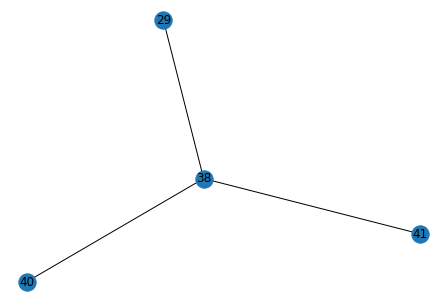

match_branches = [[38, 41], [29, 40]]
edges_to_delete (resolve crossover) = [[29, 38], [29, 41], [38, 40], [40, 41]]
edges_to_create (resolve crossover) = [[38, 41], [29, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[29, 38], [29, 41], [38, 40], [40, 41]]
edges_to_create = [[38, 41], [29, 40]]
Number of connected components = 3
Comp 0 = {0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 24, 28, 37, 38, 41, 47, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 88, 89}
Comp 1 = {1, 5, 11, 19, 21, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 84, 85, 86, 87}
Comp 2 = {62}
curr_limb_copy.deleted_edges = [[29, 38], [29, 41], [38, 40], [40, 41]]
curr_limb_copy.created_edges = [[38, 41], [29, 40]]
After get best cut: cut_edges = [[29, 38], [29, 41], [38, 40], [40, 41]], added_edges = [[38, 41], [29, 40]]
total_soma_pa

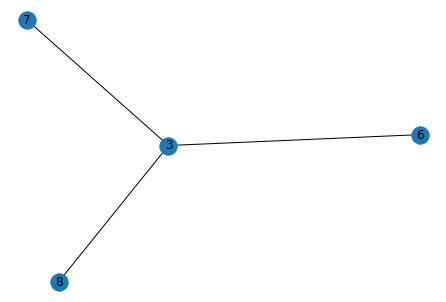

match_branches = [[3, 7]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]]
edges_to_create (resolve crossover) = [[3, 7]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]]
edges_to_create = [[3, 7]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {1, 19, 6}
curr_limb_copy.deleted_edges = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]]
curr_limb_copy.created_edges = [[3, 7]]
After get best cut: cut_edges = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]], added_edges = [[3, 7]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
Shortest path = [0, 4, 10, 24, 22, 16, 15, 12, 5]

 --------- START OF GET BEST EDG

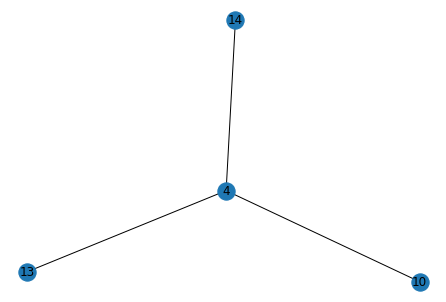

match_branches = []
edges_to_delete (resolve crossover) = [[4, 10], [4, 13], [4, 14], [10, 13], [10, 14], [13, 14]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[4, 10], [4, 13], [4, 14], [10, 13], [10, 14], [13, 14]]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 3, 4, 7}
Comp 1 = {1, 19, 6}
Comp 2 = {2, 5, 8, 10, 11, 12, 15, 16, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34}
Comp 3 = {27, 28, 13}
Comp 4 = {17, 18, 14}
Comp 5 = {9}
curr_limb_copy.deleted_edges = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8], [4, 10], [4, 13], [4, 14], [10, 13], [10, 14], [13, 14]]
curr_limb_copy.created_edges = [[3, 7]]
After get best cut: cut_edges = [[4, 10], [4, 13], [4, 14], [10, 13], [10, 14], [13, 14]], added_edges = []
total_soma_paths_to_cut = [[3, 6], [3, 8], [6, 7], [6, 8], [7, 8]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs

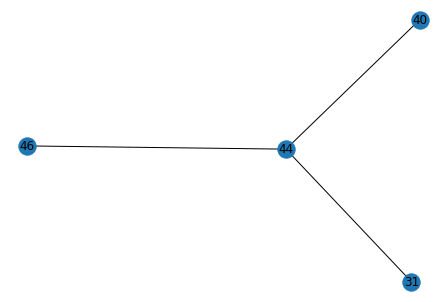

match_branches = [[31, 46], [40, 44]]
edges_to_delete (resolve crossover) = [[31, 40], [31, 44], [40, 46], [44, 46]]
edges_to_create (resolve crossover) = [[31, 46], [40, 44]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[31, 40], [31, 44], [40, 46], [44, 46]]
edges_to_create = [[31, 46], [40, 44]]
Number of connected components = 3
Comp 0 = {1, 43, 46, 47, 29, 31}
Comp 1 = {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 48, 49, 50, 51, 52}
Comp 2 = {45}
curr_limb_copy.deleted_edges = [[31, 40], [31, 44], [40, 46], [44, 46]]
curr_limb_copy.created_edges = [[31, 46], [40, 44]]
After get best cut: cut_edges = [[31, 40], [31, 44], [40, 46], [44, 46]], added_edges = [[31, 46], [40, 44]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total numb

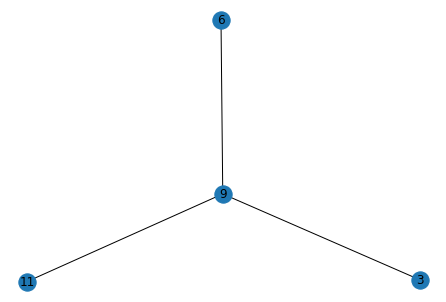

match_branches = [[6, 9], [3, 11]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 9], [6, 11], [9, 11]]
edges_to_create (resolve crossover) = [[6, 9], [3, 11]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 6], [3, 9], [6, 11], [9, 11]]
edges_to_create = [[6, 9], [3, 11]]
Number of connected components = 2
Comp 0 = {2, 3, 5, 7, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
Comp 1 = {0, 1, 4, 6, 8, 9, 10, 13}
curr_limb_copy.deleted_edges = [[3, 6], [3, 9], [6, 11], [9, 11]]
curr_limb_copy.created_edges = [[6, 9], [3, 11]]
After get best cut: cut_edges = [[3, 6], [3, 9], [6, 11], [9, 11]], added_edges = [[6, 9], [3, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 

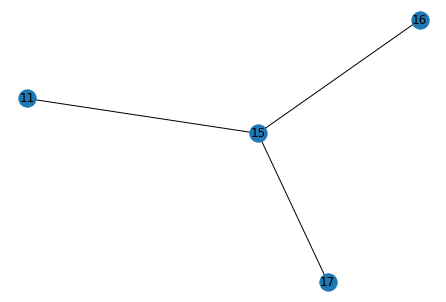

match_branches = [[15, 16], [11, 17]]
edges_to_delete (resolve crossover) = [[11, 15], [11, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[15, 16], [11, 17]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 14 because skeletal distance was 2156.0512137865016 and threshold was 2500
skip_nodes = [14]
edges_to_delete (cut_limb_network) = [[11, 15], [11, 16], [15, 17], [16, 17]]
edges_to_create = [[15, 16], [11, 17]]
Number of connected components = 2
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16}
Comp 1 = {3, 17, 2, 11}
curr_limb_copy.deleted_edges = [[11, 15], [11, 16], [15, 17], [16, 17]]
curr_limb_copy.created_edges = [[15, 16], [11, 17]]
After get best cut: cut_edges = [[11, 15], [11, 16], [15, 17], [16, 17]], added_edges = [[15, 16], [11, 17]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL =

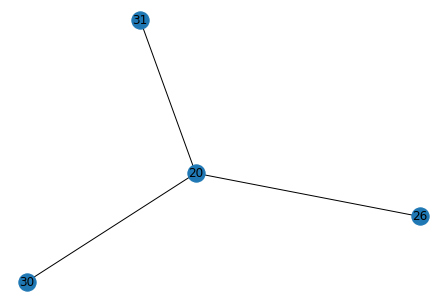

match_branches = []
edges_to_delete (resolve crossover) = [[20, 26], [20, 30], [20, 31], [26, 30], [26, 31], [30, 31]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[20, 26], [20, 30], [20, 31], [26, 30], [26, 31], [30, 31]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29}
Comp 1 = {32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 75, 76, 77, 25, 26}
Comp 2 = {2, 30, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Comp 3 = {73, 74, 31}
curr_limb_copy.deleted_edges = [[20, 26], [20, 30], [20, 31], [26, 30], [26, 31], [30, 31]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[20, 26], [20, 30], [20, 31], [26, 30], [26, 31], [30, 31]], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0----------

  Edge: [7 8]: curr_angle = 33.63
  Edge: [ 8 10]: curr_angle = 39.04
  Edge: [10 13]: curr_angle = 28.3
  Edge: [13 15]: curr_angle = 28.56
  Edge: [15 21]: curr_angle = 16.98
  Edge: [21 22]: curr_angle = 17.21
  Edge: [22 24]: curr_angle = 21.47
  Edge: [24 26]: curr_angle = 14.55
  Edge: [26 29]: curr_angle = 22.25
  Edge: [29 31]: curr_angle = 28.3
  Edge: [31 45]: curr_angle = 54.12
  Edge: [45 47]: curr_angle = 24.94
  Edge: [47 41]: curr_angle = 13.35
  Edge: [41 42]: curr_angle = 23.74
  Edge: [42 43]: curr_angle = 27.53
  Edge: [43 46]: curr_angle = 9.62

Total time for doubling_back = 1.0167262554168701

Attempting the width jump check (attempting from both sides)
  Edge: [7 8]: jump = -294.41
  Edge: [ 8 10]: jump = 57.21
  Edge: [10 13]: jump = -57.48
  Edge: [13 15]: jump = -13.18
  Edge: [15 21]: jump = 69.55
  Edge: [21 22]: jump = -67.31
  Edge: [22 24]: jump = -22.85
  Edge: [24 26]: jump = -17.88
  Edge: [26 29]: jump = 237.38
Adding error edge [26 29] because width 

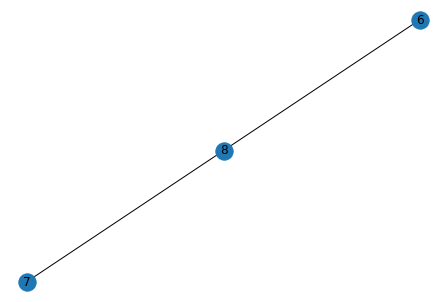

match_branches = [[7, 8]]
edges_to_delete (resolve crossover) = [[6, 7], [6, 8]]
edges_to_create (resolve crossover) = [[7, 8]]
Rejecting creating edge [7, 8] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([6, 7]), array([6, 8]), array([7, 8])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51}
Comp 1 = {0, 1, 2, 5, 6}
Comp 2 = {7}
curr_limb_copy.deleted_edges = [array([6, 7]), array([6, 8]), array([7, 8])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([6, 7]), array([6, 8]), array([7, 8])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTI

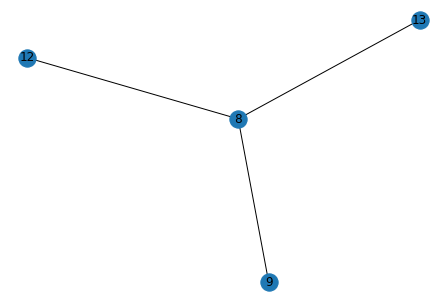

match_branches = [[8, 13]]
edges_to_delete (resolve crossover) = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13]]
edges_to_create (resolve crossover) = [[8, 13]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 7 because skeletal distance was 2325.907092626387 and threshold was 2500
skip_nodes = [7]
edges_to_delete (cut_limb_network) = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13]]
edges_to_create = [[8, 13]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 16, 17, 19, 20, 22, 23}
Comp 1 = {9, 14, 15, 18, 21}
Comp 2 = {12}
Comp 3 = {10}
curr_limb_copy.deleted_edges = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13]]
curr_limb_copy.created_edges = [[8, 13]]
After get best cut: cut_edges = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13]], added_edges = [[8, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTI

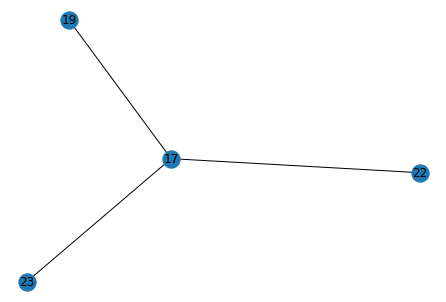

match_branches = [[17, 23], [19, 22]]
edges_to_delete (resolve crossover) = [[17, 19], [17, 22], [19, 23], [22, 23]]
edges_to_create (resolve crossover) = [[17, 23], [19, 22]]
curr_limb.deleted_edges 5 =[[8, 9], [8, 12], [9, 12], [9, 13], [12, 13]]
Skipping endnode 7 because skeletal distance was 2325.907092626387 and threshold was 2500
skip_nodes = [7]
edges_to_delete (cut_limb_network) = [[17, 19], [17, 22], [19, 23], [22, 23]]
edges_to_create = [[17, 23], [19, 22]]
Number of connected components = 5
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 16, 17, 23}
Comp 1 = {9, 14, 15, 18, 21}
Comp 2 = {12}
Comp 3 = {11, 19, 20, 22}
Comp 4 = {10}
curr_limb_copy.deleted_edges = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13], [17, 19], [17, 22], [19, 23], [22, 23]]
curr_limb_copy.created_edges = [[8, 13], [17, 23], [19, 22]]
After get best cut: cut_edges = [[17, 19], [17, 22], [19, 23], [22, 23]], added_edges = [[17, 23], [19, 22]]
total_soma_paths_to_cut = [[8, 9], [8, 12], [9, 12], [9, 13], [12, 13

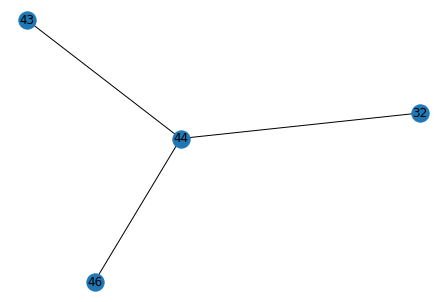

match_branches = [[32, 43]]
edges_to_delete (resolve crossover) = [[32, 44], [32, 46], [43, 44], [43, 46], [44, 46]]
edges_to_create (resolve crossover) = [[32, 43]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 959.3856405908917 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[32, 44], [32, 46], [43, 44], [43, 46], [44, 46]]
edges_to_create = [[32, 43]]
Number of connected components = 3
Comp 0 = {0, 33, 34, 1, 4, 37, 38, 32, 8, 9, 43, 50, 19, 54, 29, 31}
Comp 1 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 44, 45, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 46], [43, 44], [43, 46], [44, 46]]
curr_limb_copy.created_edges = [[32, 43]]
After get best cut: cut_edges = [[32, 44], [32, 46], [43, 44], [43, 46], [44, 46]], added_edges = [[32, 43]]
total_soma_paths_to_cut = []
-----------co

  Edge: [32 43]: curr_angle = 13.48
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [43 37]: curr_angle = 27.86
  Edge: [37 34]: curr_angle = 20.68
  Edge: [34 33]: curr_angle = 27.14

Total time for doubling_back = 0.10361576080322266

Attempting the width jump check (attempting from both sides)
  Edge: [32 43]: jump = 149.79
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [43 37]: jump = 5.6
  Edge: [37 34]: jump = 301.6
Adding error edge [37 34] because width jump was 301.60317572846975
  Edge: [34 33]: jump = 47.2
Total time for width = 0.07867240905761719
Path starting at 31 had err_edges: [[37, 34]]
  Edge: [33 34]: jump = -47.2
  Edge: [34 37]: jump = -301.6
  Edge: [37 43]: jump = -5.6
  Edge: [43 32]: jump = -206.71
Total time for width = 0.08538389205932617
Path starting at 33 had err_edges: []
first_error_sizes = [301.60317572846975, -inf], winning_path = 0
***inside resolve crossover!!!!

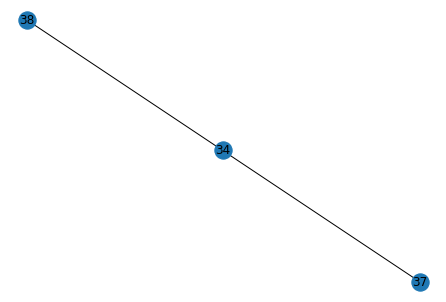

match_branches = [[34, 37]]
edges_to_delete (resolve crossover) = [[34, 38], [37, 38]]
edges_to_create (resolve crossover) = [[34, 37]]
Rejecting creating edge [34, 37] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([34, 37]), array([34, 38]), array([37, 38])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {0, 33, 34, 1, 4, 8, 9}
Comp 1 = {32, 37, 43, 50, 19, 54, 29, 31}
Comp 2 = {38}
Comp 3 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 44, 45, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61}
Comp 4 = {46}
curr_limb_copy.deleted_edges = [[32, 44], [32, 46], [43, 44], [43, 46], [44, 46], array([34, 37]), array([34, 38]), array([37, 38])]
curr_limb_copy.created_edges = [[32, 43]]
After get best cut: cut_edges = [array([34, 37]), array([34, 38]), array([37, 38])], added_edges = []
total_soma_paths_to_cut = [[32, 44], [32, 46], [43, 44], [43, 46]

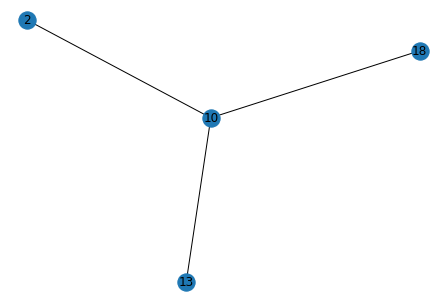

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[[32, 44], [32, 46], [43, 44], [43, 46], [44, 46], array([34, 37]), array([34, 38]), array([37, 38])]
Skipping endnode 42 because skeletal distance was 2282.0704130001513 and threshold was 2500
Skipping endnode 51 because skeletal distance was 670.2762462883263 and threshold was 2500
skip_nodes = [42, 51]
edges_to_delete (cut_limb_network) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create = [[13, 18]]
Number of connected components = 9
Comp 0 = {0, 33, 34, 1, 4, 8, 9}
Comp 1 = {32, 37, 43, 50, 19, 54, 29, 31}
Comp 2 = {38}
Comp 3 = {3, 5, 7, 10, 11, 12, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 35, 36, 40, 41, 42, 44, 45, 47, 53, 58, 59, 60, 61}
Comp 4 = {46}
Comp 5 = {2}
Comp 6 = {6, 39, 13, 15, 49, 18, 51, 52, 55, 56, 57, 30}
Comp 7 = {14}
Comp 8 = {48}
curr_limb_copy.deleted_edg

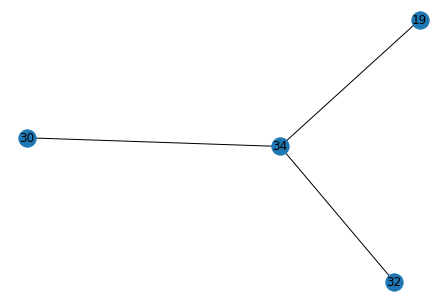

match_branches = [[19, 34], [30, 32]]
edges_to_delete (resolve crossover) = [[19, 30], [19, 32], [30, 34], [32, 34]]
edges_to_create (resolve crossover) = [[19, 34], [30, 32]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[19, 30], [19, 32], [30, 34], [32, 34]]
edges_to_create = [[19, 34], [30, 32]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 43, 44, 45, 46}
Comp 1 = {34, 4, 40, 41, 10, 42, 18, 19}
curr_limb_copy.deleted_edges = [[19, 30], [19, 32], [30, 34], [32, 34]]
curr_limb_copy.created_edges = [[19, 34], [30, 32]]
After get best cut: cut_edges = [[19, 30], [19, 32], [30, 34], [32, 34]], added_edges = [[19, 34], [30, 32]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the spl

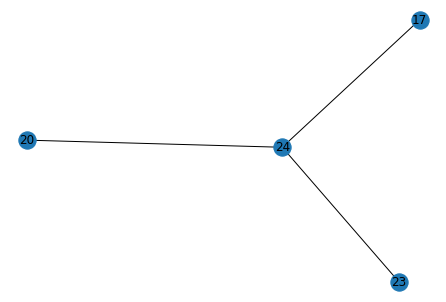

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 12 because skeletal distance was 1187.16554799824 and threshold was 2500
skip_nodes = [12]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]], added_edges = [[23, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3


  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 35.66
  Edge: [24 23]: curr_angle = 10.99
  Edge: [23 21]: curr_angle = 23.99
  Edge: [21 28]: curr_angle = 30.7
  Edge: [28 30]: curr_angle = 18.19
  Edge: [30 32]: curr_angle = 37.95

Total time for doubling_back = 1.0344877243041992

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -123.78
  Edge: [19 24]: jump = 25.23
  Edge: [24 23]: jump = 264.75
Adding error edge [24 23] because width jump was 264.751013125713
  Edge: [23 21]: jump = -32.56
  Edge: [21 28]: jump = -44.02
  Edge: [28 30]: jump = 135.73
  Edge: [30 32]: jump = 4.6
Total time for width = 0.9255132675170898
Path starting at 12 had err_edges: [[24, 23]]
  Edge: [32 30]: jump = -4.6
  Edge: [30 28]: jump = -113.08
  Edge: [28 21]: jump = -70.3
  Edge: [21 23]: jump = 32.56
  Edge: [23 24]: jump = -264.75
  Edge: [24 19]: jump = -25.23
  Edge: [19 14]: jump = 56.79
Total time for width = 0.7190737724304199
Path startin

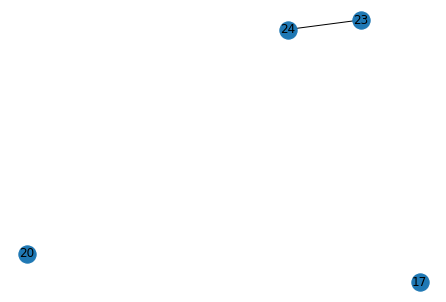

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 10, 21, 22, 23, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 11, 12, 13, 14, 18, 19, 24, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])], added_edges = []


  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 35.66
  Edge: [24 23]: curr_angle = 10.99
  Edge: [23 21]: curr_angle = 23.99
  Edge: [21 28]: curr_angle = 30.7
  Edge: [28 30]: curr_angle = 18.19
  Edge: [30 32]: curr_angle = 37.95

Total time for doubling_back = 0.9046826362609863

Attempting the width jump check (attempting from both sides)
  Edge: [14 19]: jump = -123.78
  Edge: [19 24]: jump = 25.23
  Edge: [24 23]: jump = 264.75
Adding error edge [24 23] because width jump was 264.751013125713
  Edge: [23 21]: jump = -32.56
  Edge: [21 28]: jump = -44.02
  Edge: [28 30]: jump = 135.73
  Edge: [30 32]: jump = 4.6
Total time for width = 0.8741519451141357
Path starting at 12 had err_edges: [[24, 23]]
  Edge: [32 30]: jump = -4.6
  Edge: [30 28]: jump = -113.08
  Edge: [28 21]: jump = -70.3
  Edge: [21 23]: jump = 32.56
  Edge: [23 24]: jump = -264.75
  Edge: [24 19]: jump = -25.23
  Edge: [19 14]: jump = 56.79
Total time for width = 0.7129337787628174
Path startin

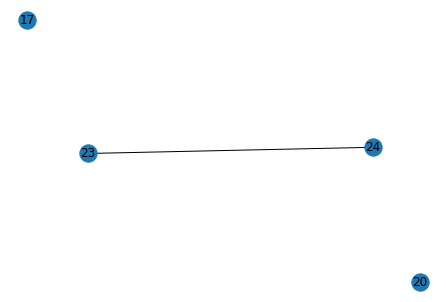

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
Rejecting creating edge [23, 24] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32, 33, 34, 4, 5, 8, 9, 10, 21, 22, 23, 28, 29, 30, 31}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
Comp 3 = {2, 3, 6, 7, 11, 12, 13, 14, 18, 19, 24, 25, 26, 27}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
curr_limb_copy.created_edges = [[23, 24]]
After get best cut: cut_edges = [array([17, 20]), a

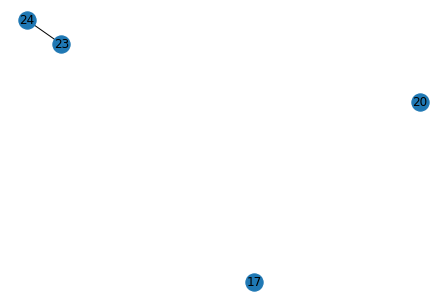

match_branches = [[23, 24]]
edges_to_delete (resolve crossover) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create (resolve crossover) = [[23, 24]]
curr_limb.deleted_edges 5 =[[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24])]
Skipping endnode 12 because skeletal distance was 1187.16554799824 and threshold was 2500
skip_nodes = [12]
edges_to_delete (cut_limb_network) = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24]]
edges_to_create = [[23, 24]]
Number of connected components = 3
Comp 0 = {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0, 1, 15, 16, 17}
Comp 2 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]),

  Edge: [14 19]: curr_angle = 20.97
  Edge: [19 24]: curr_angle = 35.66
  Edge: [24 23]: curr_angle = 10.99
  Edge: [23 21]: curr_angle = 23.99
  Edge: [21 28]: curr_angle = 30.7
  Edge: [28  8]: curr_angle = 105.82
  Edge: [8 9]: curr_angle = 150.99
  Edge: [ 9 10]: curr_angle = 145.62
  Edge: [10 34]: curr_angle = 15.13

Total time for doubling_back = 1.9448604583740234
There were 3 edges that passed doubling back threshold of 100
Winning edge [8 9] had a doubling back of 150.99190488757287
***inside resolve crossover!!!!****
coordinate_branches = [4, 8, 9]
4 = red
8 = aqua
9 = purple
Angle between 4 and 8 = 27.64 
Angle between 4 and 9 = 58.38 
Angle between 8 and 9 = 149.19 
Final Matches = [[4, 8]]
matched_branches_revised = [[4, 8]]
Original graph


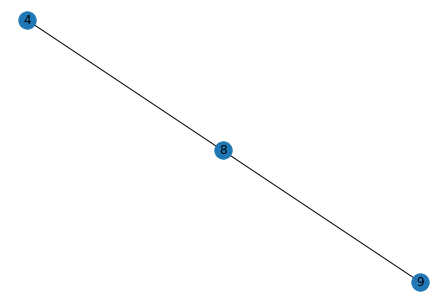

match_branches = [[4, 8]]
edges_to_delete (resolve crossover) = [[4, 9], [8, 9]]
edges_to_create (resolve crossover) = [[4, 8]]
edges_to_delete (cut_limb_network) = [array([4, 9]), array([8, 9])]
edges_to_create = [[4, 8]]
Number of connected components = 4
Comp 0 = {33, 34, 5, 9, 10}
Comp 1 = {2, 3, 4, 6, 7, 8, 11, 12, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
Comp 2 = {0, 1, 15, 16, 17}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), array([17, 20]), array([17, 23]), array([17, 24]), array([20, 23]), array([20, 24]), array([23, 24]), [17, 20], [17, 23], [17, 24], [20, 23], [20, 24], array([4, 9]), array([8, 9])]
curr_limb_copy.created_edges = [[23, 24], [23, 24], [4, 8]]
After get best cut: cut_edges = [array([4, 9]), array([8, 9])], added_edges = [[4, 8]]
total_soma_paths_to_cut = [[17, 20], [17, 23], [17, 24], [2

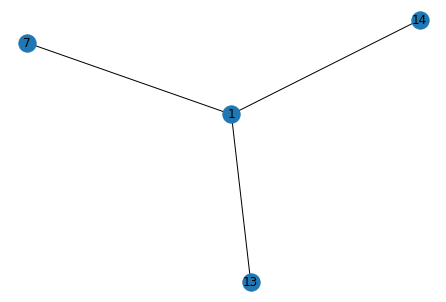

match_branches = [[7, 14]]
edges_to_delete (resolve crossover) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create (resolve crossover) = [[7, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
edges_to_create = [[7, 14]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 8, 9}
Comp 1 = {3, 4, 5, 6, 7, 14}
Comp 2 = {10, 11, 12, 13, 15, 16, 17, 18}
curr_limb_copy.deleted_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]]
curr_limb_copy.created_edges = [[7, 14]]
After get best cut: cut_edges = [[1, 7], [1, 13], [1, 14], [7, 13], [13, 14]], added_edges = [[7, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([0, 

  Edge: [0 1]: curr_angle = 27.27

Total time for doubling_back = 0.2919752597808838

Attempting the width jump check (attempting from both sides)
  Edge: [0 1]: jump = 71.43
Total time for width = 0.22075867652893066
Path starting at 0 had err_edges: []
  Edge: [1 0]: jump = -71.43
Total time for width = 0.27118992805480957
Path starting at 1 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135699307810 = 177.16357564926147 ------


----- Working on Neuron 864691135373423816-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total 

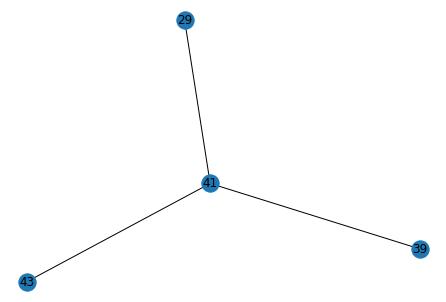

match_branches = [[39, 41]]
edges_to_delete (resolve crossover) = [[29, 39], [29, 41], [29, 43], [39, 43], [41, 43]]
edges_to_create (resolve crossover) = [[39, 41]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 47 because skeletal distance was 2408.2453205669567 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[29, 39], [29, 41], [29, 43], [39, 43], [41, 43]]
edges_to_create = [[39, 41]]
Number of connected components = 2
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
Comp 1 = {0, 21, 29}
curr_limb_copy.deleted_edges = [[29, 39], [29, 41], [29, 43], [39, 43], [41, 43]]
curr_limb_copy.created_edges = [[39, 41]]
After get best cut: cut_edges = [[29, 39], [29, 41], [29, 43], [39, 43], [41, 43]], added_edges = [[39, 41]]
total_soma_paths_to

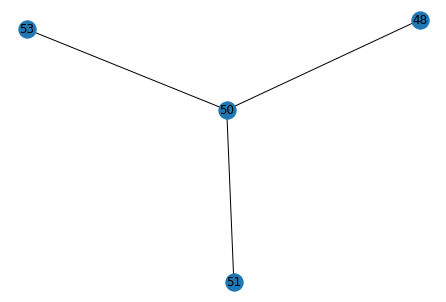

match_branches = [[48, 51]]
edges_to_delete (resolve crossover) = [[48, 50], [48, 53], [50, 51], [50, 53], [51, 53]]
edges_to_create (resolve crossover) = [[48, 51]]
curr_limb.deleted_edges 5 =[[29, 39], [29, 41], [29, 43], [39, 43], [41, 43]]
Skipping endnode 47 because skeletal distance was 2408.2453205669567 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[48, 50], [48, 53], [50, 51], [50, 53], [51, 53]]
edges_to_create = [[48, 51]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 49, 50, 54, 55}
Comp 1 = {0, 21, 29}
Comp 2 = {64, 65, 66, 67, 68, 69, 43, 47, 48, 51, 56, 57, 58, 59, 60, 61, 62, 63}
Comp 3 = {53}
Comp 4 = {52}
curr_limb_copy.deleted_edges = [[29, 39], [29, 41], [29, 43], [39, 43], [41, 43], [48, 50], [48, 53], [50, 51], [50, 53], [51, 53]]
curr_limb_copy.created_edges = [[39, 41], 

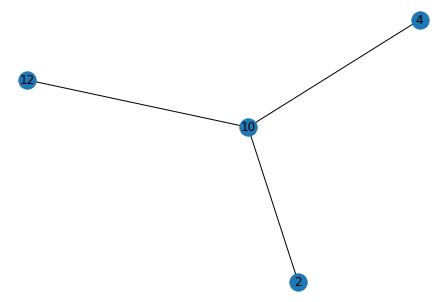

match_branches = [[10, 12]]
edges_to_delete (resolve crossover) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create (resolve crossover) = [[10, 12]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create = [[10, 12]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 1 = {2}
Comp 2 = {4}
Comp 3 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]], added_edges = [[10, 12]]
total_soma_paths_to_cut = []
----

  Edge: [16 10]: curr_angle = 30.83
  Edge: [10 12]: curr_angle = 13.94
  Edge: [12 13]: curr_angle = 16.64
  Edge: [13 15]: curr_angle = 20.83
  Edge: [15 22]: curr_angle = 40.98
  Edge: [22 23]: curr_angle = 28.4
  Edge: [23 25]: curr_angle = 30.38
  Edge: [25 37]: curr_angle = 38.74
  Edge: [37 52]: curr_angle = 58.44
  Edge: [52 53]: curr_angle = 13.32
  Edge: [53 54]: curr_angle = 10.27
  Edge: [54 58]: curr_angle = 13.8
  Edge: [58 61]: curr_angle = 3.05
  Edge: [61 62]: curr_angle = 19.21
  Edge: [62 69]: curr_angle = 35.87
  Edge: [69 67]: curr_angle = 34.16
  Edge: [67 64]: curr_angle = 43.39

Total time for doubling_back = 1.6935780048370361

Attempting the width jump check (attempting from both sides)
  Edge: [16 10]: jump = -49.26
  Edge: [10 12]: jump = 55.44
  Edge: [12 13]: jump = 128.84
  Edge: [13 15]: jump = 32.43
  Edge: [15 22]: jump = -229.21
  Edge: [22 23]: jump = -216.25
  Edge: [23 25]: jump = -50.85
  Edge: [25 37]: jump = 85.35
  Edge: [37 52]: jump = -34.75


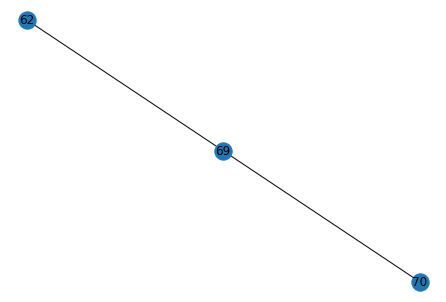

match_branches = [[62, 69]]
edges_to_delete (resolve crossover) = [[62, 70], [69, 70]]
edges_to_create (resolve crossover) = [[62, 69]]
Rejecting creating edge [62, 69] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([62, 69]), array([62, 70]), array([69, 70])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {64, 67, 68, 69, 39, 40, 73, 74, 75, 76, 77, 78, 50, 51, 56, 57, 59}
Comp 1 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 58, 60, 61, 62, 63, 65, 66, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 2 = {72, 70, 71}
Comp 3 = {2}
Comp 4 = {4}
Comp 5 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12], array([62, 69]), array([62, 70]), array([69, 70])]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [array([62, 69]

  Edge: [23 20]: curr_angle = 14.92
  Edge: [20 21]: curr_angle = 30.9
  Edge: [21 24]: curr_angle = 54.89
  Edge: [24 28]: curr_angle = 31.35
  Edge: [28 34]: curr_angle = 28.54
  Edge: [34 35]: curr_angle = 18.18
  Edge: [35 36]: curr_angle = 9.75

Total time for doubling_back = 0.8639726638793945

Attempting the width jump check (attempting from both sides)
  Edge: [23 20]: jump = 18.76
  Edge: [20 21]: jump = -24.18
  Edge: [21 24]: jump = -455.39
  Edge: [24 28]: jump = -1.86
  Edge: [28 34]: jump = 141.39
  Edge: [34 35]: jump = 54.56
  Edge: [35 36]: jump = 105.03
Total time for width = 0.8645274639129639
Path starting at 26 had err_edges: []
  Edge: [36 35]: jump = -105.03
  Edge: [35 34]: jump = -54.56
  Edge: [34 28]: jump = -141.39
  Edge: [28 24]: jump = 1.86
  Edge: [24 21]: jump = 376.76
Adding error edge [24 21] because width jump was 376.7620383088253
  Edge: [21 20]: jump = 214.93
Adding error edge [21 20] because width jump was 214.93370696318635
  Edge: [20 23]: jump

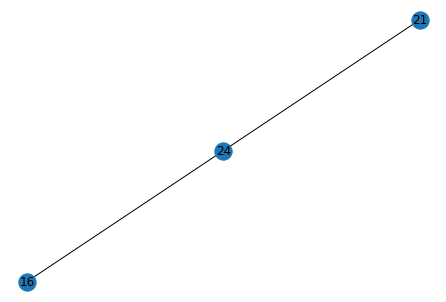

match_branches = [[16, 21]]
edges_to_delete (resolve crossover) = [[16, 24], [21, 24]]
edges_to_create (resolve crossover) = [[16, 21]]
edges_to_delete (cut_limb_network) = [array([16, 24]), array([21, 24])]
edges_to_create = [[16, 21]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27}
Comp 1 = {32, 33, 34, 35, 36, 13, 24, 28, 29, 30, 31}
curr_limb_copy.deleted_edges = [array([16, 24]), array([21, 24])]
curr_limb_copy.created_edges = [[16, 21]]
After get best cut: cut_edges = [array([16, 24]), array([21, 24])], added_edges = [[16, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 

  Edge: [0 2]: curr_angle = 67.26

Total time for doubling_back = 0.19029712677001953

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -39.86
Total time for width = 0.16652894020080566
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 39.86
Total time for width = 0.1678636074066162
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135526114907 = 271.6718611717224 ------


----- Working on Neuron 864691136116159140-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total t

  Edge: [30 21]: curr_angle = 30.41
  Edge: [21 23]: curr_angle = 38.7
  Edge: [23 27]: curr_angle = 152.99
  Edge: [27 32]: curr_angle = 107.18
  Edge: [32 35]: curr_angle = 169.44
  Edge: [35 40]: curr_angle = 53.48
  Edge: [40 42]: curr_angle = 13.4
  Edge: [42 43]: curr_angle = 177.25
  Edge: [43 44]: curr_angle = 43.15
  Edge: [44 45]: curr_angle = 67.46
  Edge: [45 52]: curr_angle = 71.55
  Edge: [52 49]: curr_angle = 67.78
  Edge: [49 41]: curr_angle = 86.99

Total time for doubling_back = 0.3309621810913086
There were 4 edges that passed doubling back threshold of 100
Winning edge [42 43] had a doubling back of 177.254234877528
***inside resolve crossover!!!!****
coordinate_branches = [5, 42, 43]
5 = red
42 = aqua
43 = purple
Angle between 5 and 42 = 59.11 
Angle between 5 and 43 = 95.65 
Angle between 42 and 43 = 26.03 
Final Matches = [[42, 43]]
matched_branches_revised = [[42, 43]]
Original graph


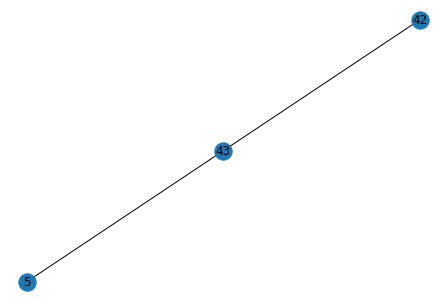

match_branches = [[42, 43]]
edges_to_delete (resolve crossover) = [[5, 42], [5, 43]]
edges_to_create (resolve crossover) = [[42, 43]]
Rejecting creating edge [42, 43] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([ 5, 42]), array([ 5, 43]), array([42, 43])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {10, 14, 15, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

  Edge: [30 21]: curr_angle = 30.41
  Edge: [21 22]: curr_angle = 94.01
  Edge: [22 24]: curr_angle = 67.08
  Edge: [24 58]: curr_angle = 71.2
  Edge: [58 57]: curr_angle = 28.73
  Edge: [57 63]: curr_angle = 31.41
  Edge: [63 87]: curr_angle = 28.29
  Edge: [87 92]: curr_angle = 26.18

Total time for doubling_back = 0.5465619564056396

Attempting the width jump check (attempting from both sides)
  Edge: [30 21]: jump = -178.96
  Edge: [21 22]: jump = -203.34
  Edge: [22 24]: jump = -59.0
  Edge: [24 58]: jump = -116.29
  Edge: [58 57]: jump = 98.54
  Edge: [57 63]: jump = 15.04
  Edge: [63 87]: jump = 90.09
  Edge: [87 92]: jump = 181.12
Total time for width = 0.501859188079834
Path starting at 30 had err_edges: []
  Edge: [92 87]: jump = -181.12
  Edge: [87 63]: jump = -90.09
  Edge: [63 57]: jump = -15.04
  Edge: [57 58]: jump = -98.54
  Edge: [58 24]: jump = 116.29
  Edge: [24 22]: jump = 59.0
  Edge: [22 21]: jump = 203.34
Adding error edge [22 21] because width jump was 203.33901

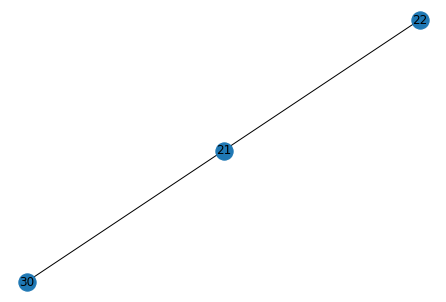

match_branches = []
edges_to_delete (resolve crossover) = [[21, 22], [21, 30], [22, 30]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([21, 22]), array([21, 30]), array([22, 30])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {10, 14, 15, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202}


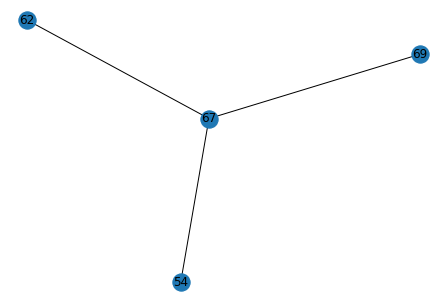

match_branches = [[62, 67], [54, 69]]
edges_to_delete (resolve crossover) = [[54, 62], [54, 67], [62, 69], [67, 69]]
edges_to_create (resolve crossover) = [[62, 67], [54, 69]]
curr_limb.deleted_edges 5 =[array([ 5, 42]), array([ 5, 43]), array([42, 43]), array([21, 22]), array([21, 30]), array([22, 30])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[54, 62], [54, 67], [62, 69], [67, 69]]
edges_to_create = [[62, 67], [54, 69]]
Number of connected components = 6
Comp 0 = {10, 14, 15, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 60, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 

  Edge: [41 49]: curr_angle = 66.04
  Edge: [49 54]: curr_angle = 176.32
  Edge: [54 52]: curr_angle = 14.02
  Edge: [52 45]: curr_angle = 59.98
  Edge: [45 44]: curr_angle = 60.94

Total time for doubling_back = 0.2302873134613037
There were 1 edges that passed doubling back threshold of 100
Winning edge [49 54] had a doubling back of 176.3222749762835
***inside resolve crossover!!!!****
coordinate_branches = [49, 52, 54]
49 = red
52 = aqua
54 = purple
Angle between 49 and 52 = 55.39 
Angle between 49 and 54 = 112.82 
Angle between 52 and 54 = 20.89 
Final Matches = [[52, 54]]
matched_branches_revised = [[52, 54]]
Original graph


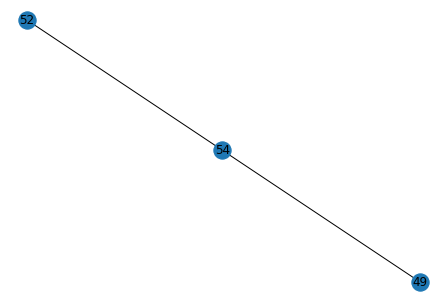

match_branches = [[52, 54]]
edges_to_delete (resolve crossover) = [[49, 52], [49, 54]]
edges_to_create (resolve crossover) = [[52, 54]]
edges_to_delete (cut_limb_network) = [array([49, 52]), array([49, 54])]
edges_to_create = [[52, 54]]
Number of connected components = 7
Comp 0 = {41, 50, 49}
Comp 1 = {10, 14, 15, 43, 44, 45, 46, 47, 48, 52, 53, 54, 55, 60, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")